(20%) Describe: Create a git repository and make it available online for the lecturer to clone. The repository should contain all your work for this assessment. Within the repository, create a jupyter [6] notebook that uses descriptive statistics and plots to describe the Boston House Prices [1] dataset. 

*Good summary of the dataset, repository well laid-out and organised. Reasonable commits to the repository.*

(20%) Infer: To the above jupyter notebook, add a section where you use inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t. You should explain and discuss your findings within the notebook.

*Appropriate analysis of the relationship between the me- dian house price and whether the house borders the river, with good explanations of the analysis.*

(60%) Predict: Again using the same notebook, use keras [7] to create a neural network that can predict the median house price based on the other variables in the dataset. You are free to interpret this as you wish — for example, you may use all the other variables, or select a subset. 

*Well-trained neural network providing decent predictions of house prices based on the other variables. Good explanations of how to use the neural network and how it works.*

- Project plan in readme / github issues
- Explanation of project in readme


[1] Boston Standard Metropolitan Statistical Area. Boston house prices dataset. https://www.kaggle.com/c/boston-housing.

[2] SciPy developers. The scipy python package. https://www.scipy.org/.

[3] Python Software Foundation. Welcome to python.org. https://www.python.org/.

[4] GMIT. Quality assurance framework. https://www.gmit.ie/general/quality-assurance-framework.

[5] GitHub Guides. Mastering markdown. https://guides.github.com/features/mastering-markdown/.

[6] Project Jupyter. Project jupyter. https://jupyter.org/.

[7] Keras Team. Keras: The python deep learning library. https://keras.io/.

## Import python packages

In [844]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd  
import seaborn as sns 
import scipy.stats as ss
from sklearn.datasets import load_boston
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
# For building neural networks.
import keras as kr
# For encoding categorical variables.
import sklearn.preprocessing as pre
# For splitting into training and test sets.
import sklearn.model_selection as mod
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
    

## Describe the dataset

In [539]:
# Load in the Boston dataset from sklearn
boston_dataset = load_boston()
print(boston_dataset.keys())
print(type(boston_dataset))

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
<class 'sklearn.utils.Bunch'>


In [922]:
# Statistical calculations for the entire Boston dataset.
print(boston.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

## Feature set of the data is:

CRIM: Per capita crime rate by town  
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft  
INDUS: Proportion of non-retail business acres per town  
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
NOX: Nitric oxide concentration (parts per 10 million)  
RM: Average number of rooms per dwelling  
AGE: Proportion of owner-occupied units built prior to 1940  
DIS: Weighted distances to five Boston employment centers  
RAD: Index of accessibility to radial highways  
TAX: Full-value property tax rate per $10,000  $  
PTRATIO: Pupil-teacher ratio by town     
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town  
LSTAT: Percentage of lower status of the population    
MEDV: Median value of owner-occupied homes in $1000s   

## Target and Feature variables

Target variable = MEDV (median house prices)  
Feature variables = other variables used for prediction of house price.  
Main feature variable in scope = CHAS (how close the property is to the charles river)  
Other variables of interest = LSTAT (lower status population) / PTRATIO (pupil teacher ratio of area)

In [929]:
# Convert bunch datatype to pandas dataframe
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

# Convert target key to 'MEDV' series variable.
boston['MEDV'] = boston_dataset.target
boston['MEDV'] 

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [930]:
# Feature variable is CHAS
boston['CHAS']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: CHAS, Length: 506, dtype: float64

In [931]:
# Check the data for null values - none present here.
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Plotting the data

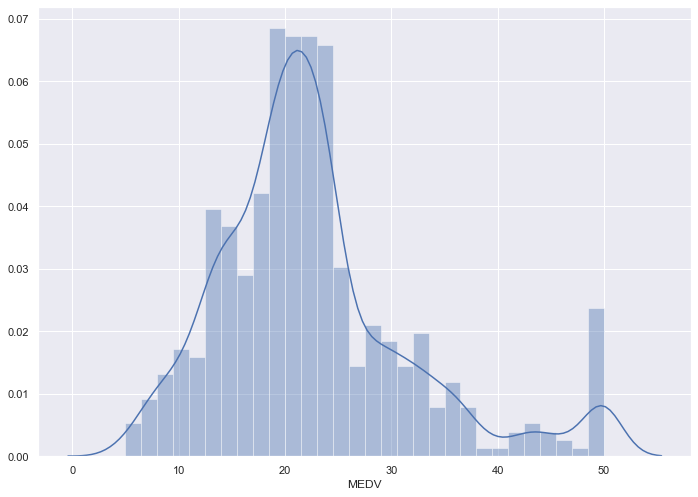

In [933]:
# MEDV datapoints are distributed normally with few outliers (except one major one at 50,000 usd).
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

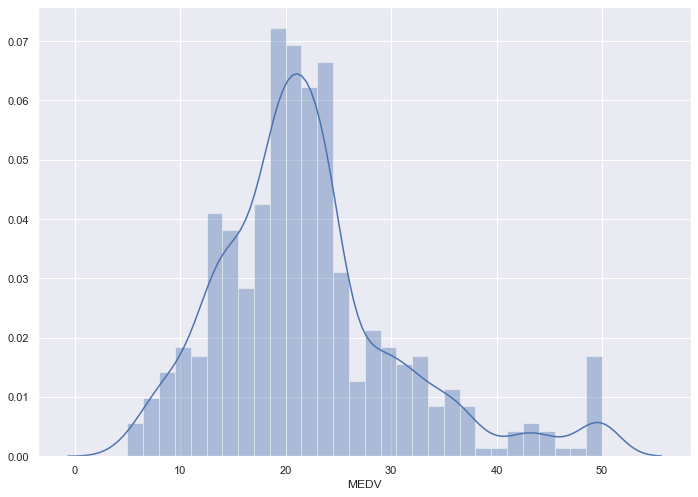

In [936]:
# Far from the river, the house prices follow a normal distribution, except for the houses around the 50K price point.
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston.MEDV.loc[boston["CHAS"] == 0], bins=30)
plt.show()

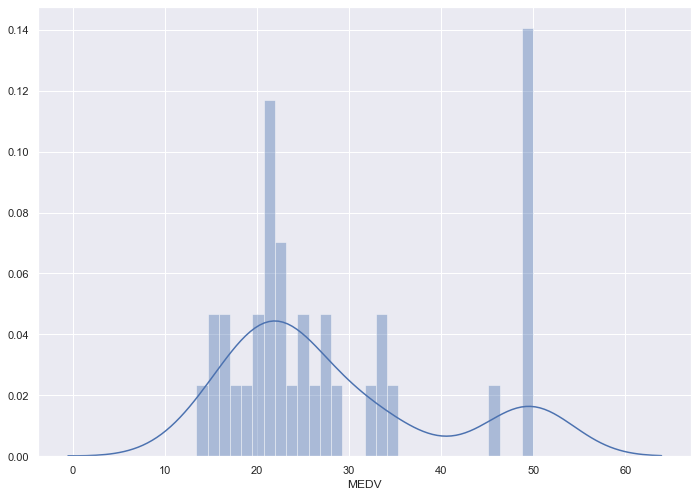

In [935]:
# Near river, there are far fewer variables in this dataset, however the outlier at 50K skews the data towards a higher average house price.
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston.MEDV.loc[boston["CHAS"] == 1], bins=30)
plt.show()

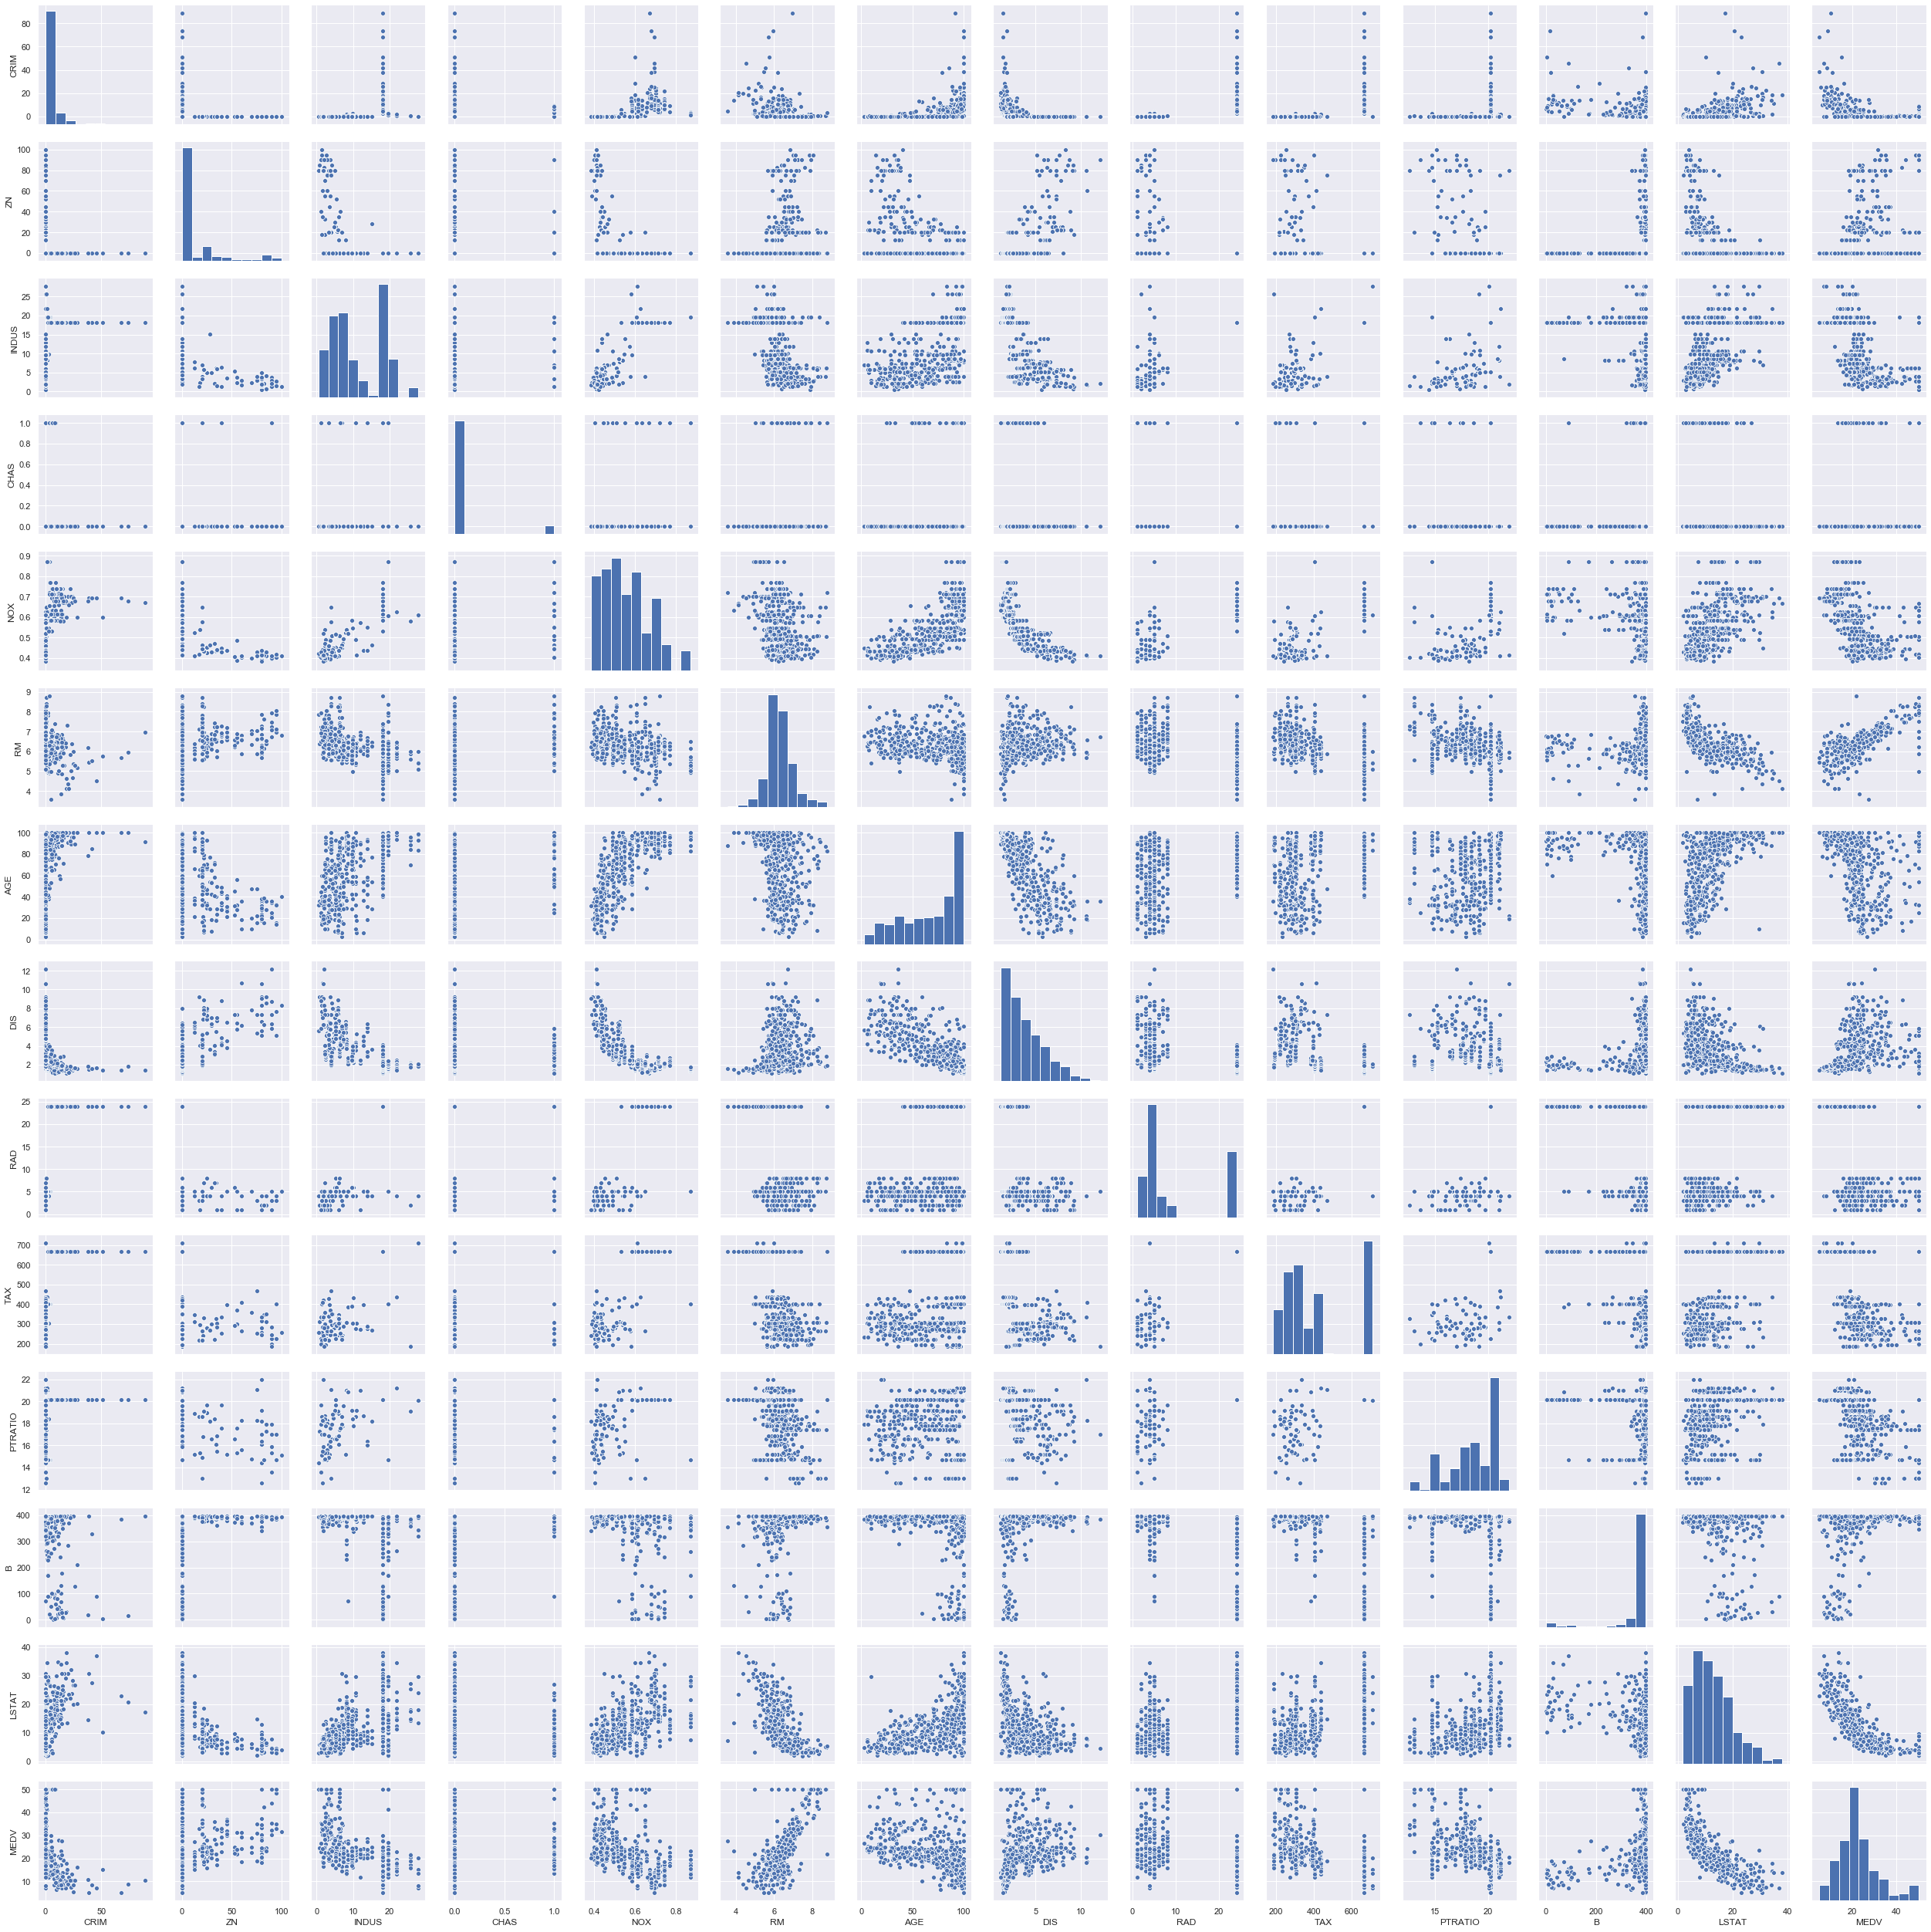

In [1011]:
# Plot each variable against each other to find correlations visually.
sns.pairplot(boston)

## Correllation matrix
1 = strong positive correlation between 2 variables  
-1 = strong negative correlation between 2 variables

LSTAT, PTRATIO and INDUS are the variables most highly correllated with MEDV, the target variable.

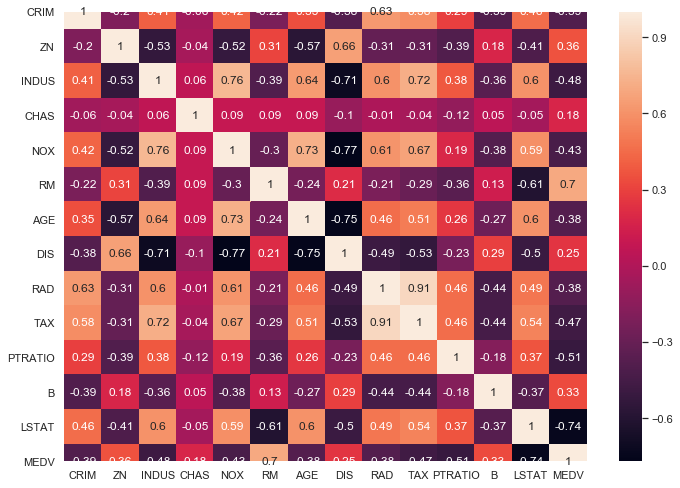

In [945]:
# The correlation matrix heatmap shows how the darker the square is, the higher the correlation between the 2 variables.
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

## Slope / intercept
y=mx+c

The number m is the slope of the line. The slope is how much y increases by when x is increased by 1.0. The number c is the y-intercept of the line. It's the value of y when x is 0.

TODO Cost / Sum of least squares
The cost/loss function measures the performance of a Machine Learning model for given data. Cost Function quantifies the error between predicted values and expected values and presents it in the form of a single real number.

CHAS is binary, therefore there are only 2 x values (1 or 0). The spread of MEDV is from 0 to 50, when the house is far from the river. The spread of MEDV is mostly from 12 to 35 when the house is near the river, or so it appears. 

As the data is not linear, we will not get a linear distribution as is the case for the RM feature variable. A boxplot is a more relevant representation of the data.

In [943]:
np.polyfit(boston['RM'], boston['MEDV'], 1)

array([  9.10210898, -34.67062078])

### Manually calculating the slope

In [944]:
# Calculate the best values for m and c.
w = boston['RM']
d = boston['MEDV']
# First calculate the means (a.k.a. averages) of w and d.
w_avg = np.mean(w)
d_avg = np.mean(d)

# Subtract means from w and d.
w_zero = w - w_avg
d_zero = d - d_avg

# The best m is found by the following calculation.
m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero)
# Use m from above to calculate the best c.
c = d_avg - m * w_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 9.102109 and c is -34.670621.


In [1009]:
np.polyfit(boston['MEDV'], boston['CHAS'], 1)

array([ 0.00484011, -0.03989141])

In [ ]:
### 

In [1088]:
# Create new df which breaks the MEDV variable into 2 separate series based on river proximity (0 or 1)
medv_far = boston.MEDV[boston['CHAS']==0]
medv_near = boston.MEDV[boston['CHAS']==1]
d = {'medv_far': medv_far, 'medv_near': medv_near, 'room_no':boston.RM, 'chas': boston.CHAS, 'low_status': boston.LSTAT }
features = pd.DataFrame(data=d)
# Remove null values
features = features.fillna(0)
# print(features)

print(np.polyfit(features['chas'], features['medv_far'], 1))
print(np.polyfit(features['room_no'], features['medv_near'], 1))

[-22.09384289  22.09384289]
[ 1.82730215 -9.51673222]


## Comparision of binary variables with linear variables
In the MEDV vs RM plot below on the right, we see a linear correlation between the 2 variables.

When the CHAS variable is plotted against MEDV (below left), we can see that this type of plot makes no sense as the features are binary. 

RM has a strong positive correlation with MEDV (0.7)   
An important point in selecting features for a linear regression model is to check for multi-co-linearity.
0.18 indicates a positive correlation of CHAS with MEDV, although it is not particularly strong.

CHAS is binary, therefore there are only 2 types of values, classified into 1 or 0. The spread of MEDV is from 0 to 50, when the house is far from the river. The spread of MEDV is mostly from 12 to 35 when the house is near the river, or so it appears.

As the data is not linear, we will not get a linear distribution as is the case for the RM feature variable. There is no point in getting the slope. A boxplot is a more relevant visualisation of the data.

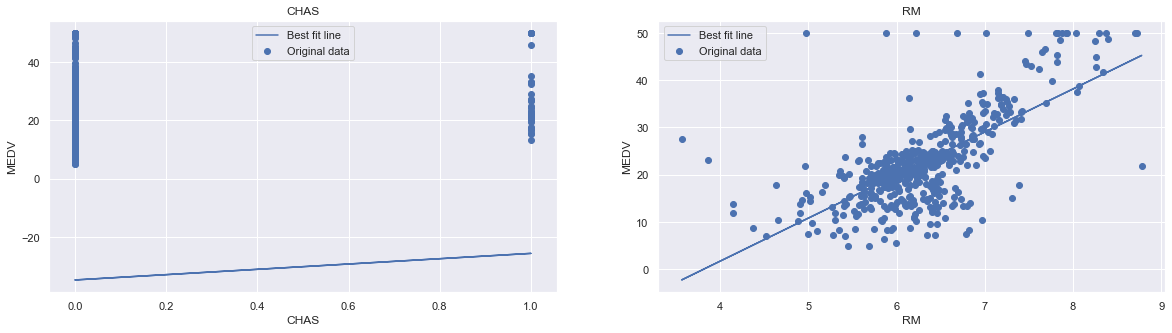

In [1046]:
plt.figure(figsize=(20, 5))
features = ['CHAS', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
# for i, col in features.iterrows():
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o', label='Original data')
    plt.plot(boston[col], 9.10210898 * boston[col] + -34.67062078, 'b-', label='Best fit line')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.legend()

## Plotting the slope of MEDV, broken into separate feature variables
When houses near river and far from the river are plotted against the room number feature, we see that a more relevant scatterplot and slope are produced. 

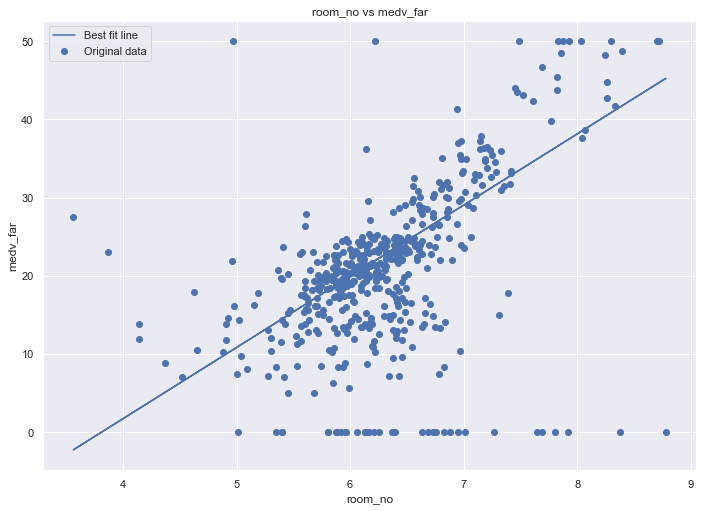

In [1064]:
# Far from the river, we can see a slight linear correlation between room number and the median value of housing.
x = features['room_no']
y = features['medv_far']
plt.scatter(x, y, marker='o', label='Original data')
plt.plot(x, 9.10210898 * x + -34.67062078, 'b-', label='Best fit line')
plt.title('room_no vs medv_far')
plt.xlabel('room_no')
plt.ylabel('medv_far')
plt.legend()

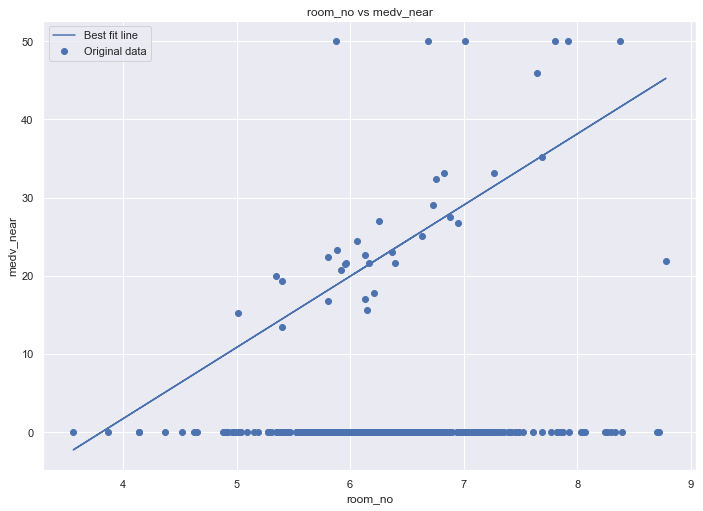

In [1073]:
# Near to the river, we can see a slight linear correlation between room number and the median value of housing, with many outliers around the 0 MEDV mark.
x = features['room_no']
y = features['medv_near']
plt.scatter(x, y, marker='o', label='Original data')
plt.plot(x, 9.10210898 * x + -34.67062078, 'b-', label='Best fit line')
plt.title('room_no vs medv_near')
plt.xlabel('room_no')
plt.ylabel('medv_near')
plt.legend()

## Boxplots
A boxplot is a better way of visualising binary data, in that we can now see the distribution of the CHAS variable in more detail, broken down into 2 variables near and far from the river.

The 50th percentile of the data is almost the same in both plots (~21 and 23 respectively). However, it appears that the majority of the data for the houses near the river (in brown) are in the 75th percentile. The minimum value is 14 thousand and the max value is 50 thousand. The values for these houses are significantly higher than houses far from the river (in blue), as 50% of the data are between 21 and 33 thousand. 

It appears that the houses far from the river are significantly cheaper, with 50% of the data spread between 17 and 25 thousand. The min value is 5 and the max is 37, if you don't include the outliers. There are many outliers at the high end of the spectrum however, representing houses that are very expensive, yet far from the river.

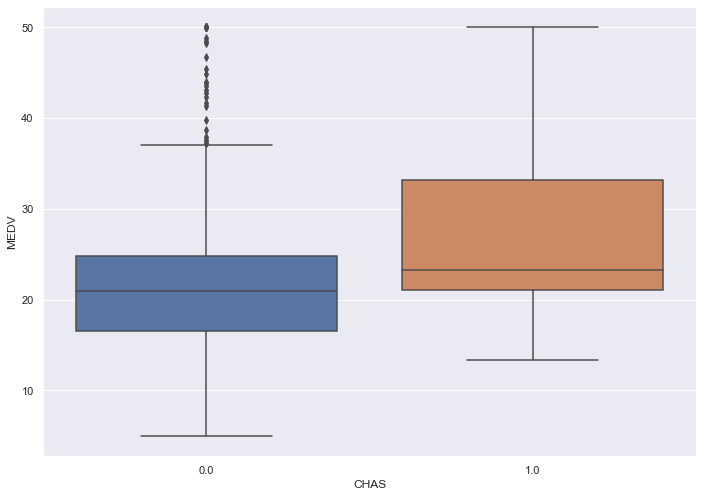

In [1066]:
ax = sns.boxplot(x=boston['CHAS'], y=boston['MEDV'])

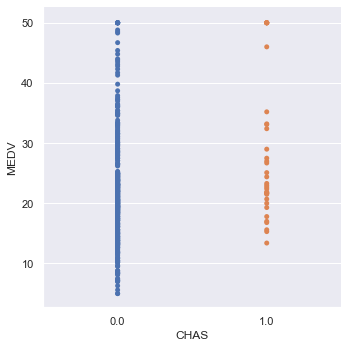

In [1067]:
# A catplot also gives a good visual breakdown of the two sub variables of near/far from river vs median house value.
sns.catplot(x='CHAS', y='MEDV', jitter=False, data=boston)

In [1069]:
# boston.min()

In [1068]:
# chas = boston['CHAS']
# boston.MEDV[chas == 1]

In [1070]:
# boston.MEDV[chas == 0]

## Student's TTest
To determine the probability that the mean price of the houses near the river is the same as the mean price of the houses far from the river we use a TTest.

There is a very small probability that the mean prices of the houses in each dataset are the same. Probability is < 0.05, at 0.00000739, therefore the average median house price for the riverside properties is different to the average median house price for the properties far from the river.

In [560]:
ss.ttest_ind(boston.MEDV[chas == 0], boston.MEDV[chas == 1])

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

We can double check this by using the describe function to check the means of each variable, with houses far from the river having a mean of 22, and houses near the river having a mean of 28.

In [561]:
# Houses far from river
boston.MEDV[chas == 0].describe()

count    471.000000
mean      22.093843
std        8.831362
min        5.000000
25%       16.600000
50%       20.900000
75%       24.800000
max       50.000000
Name: MEDV, dtype: float64

In [562]:
# Houses near river
boston.MEDV[chas == 1].describe()

count    35.000000
mean     28.440000
std      11.816643
min      13.400000
25%      21.100000
50%      23.300000
75%      33.150000
max      50.000000
Name: MEDV, dtype: float64

### ANOVA
We can also use analysis of variance to determine whether or not the means of each variable (median house price near/far from river) are the same. ANOVA ensures that a type 1 error does not occur, when the means of more than 2 variables are being compared.

Using ANOVA, the probability of the means being equal is very low at 0.000007.39.

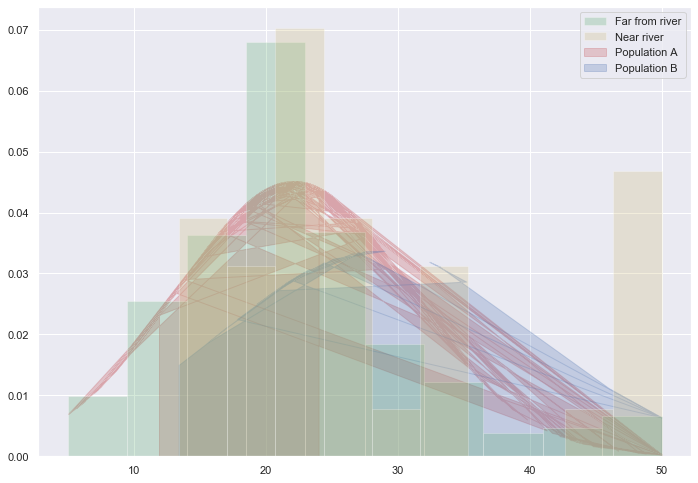

In [563]:
popA = boston.MEDV[chas == 0]
popB = boston.MEDV[chas == 1]

# The probability density functions (PDFs) for the two populations.
pdfA = ss.norm.pdf(popA, popA.mean(), popA.std())
pdfB = ss.norm.pdf(popB, popB.mean(), popB.std())

# Plot the population PDFs as shaded regions.
plt.fill_between(popA, pdfA, color='r', alpha=0.25, label="Population A")
plt.fill_between(popB, pdfB, color='b', alpha=0.25, label="Population B")

# Plot histograms of the two samples.
plt.hist(popA, density=True, color='g', alpha=0.25, label="Far from river")
plt.hist(popB, density=True, color='y', alpha=0.25, label="Near river")

# # Display a legend.
plt.legend()
plt.show()

In [564]:
# ANOVA using scipy stats f_oneway function
ss.f_oneway(boston.MEDV[chas == 0], boston.MEDV[chas == 1])

F_onewayResult(statistic=15.971512420371955, pvalue=7.390623170520815e-05)

## Testing for ANOVA accuracy

In order for ANOVA analysis to be accurate, three assumptions are made:
- Normality
** Caveat to this is, if group sizes are equal, the F-statistic is robust to violations of normality 
- Homogeneity of variance
** Same caveat as above, if group sizes are equal, the F-statistic is robust to this violation
- Independent observations
[8]


Using the summary_cont() function we can compare the standard deviations of the MEDV variable when it is near vs far from the river. We can see that the standard deviation, the means and the size (N) is different for the 2 groups, suggesting that ANOVA will not be accurate for this samples.

In [1072]:
boston_string = boston[['MEDV', 'CHAS']]
# print(boston_string)
# boston_string = pd.DataFrame()

boston_string['distance'] = boston.CHAS.replace({0: 'far', 1: 'near'})
# print(boston_string)

rp.summary_cont(boston_string['MEDV'].groupby(boston['CHAS']))

/Users/joanhealy1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,N,Mean,SD,SE,95% Conf.,Interval
CHAS,,,,,,
0.0,471,22.093843,8.831362,0.406928,21.295417,22.892269
1.0,35,28.440000,11.816643,1.997377,24.467986,32.412014


In [1074]:
# 
results = ols('MEDV ~ C(CHAS)', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Sat, 07 Dec 2019   Prob (F-statistic):           7.39e-05
Time:                        16:14:31   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.0938      0.418     52.902      0.000      21.273      22.914
C(CHAS)[T.1.0]     6.3462      1.588      3.996      0.000       3.226       9.466
==============================================================================
Omnibus:                       81.923   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.534
Skew:                           1.043   Prob(JB):                     5.50e-28
Kurtosis:                       4.267   Cond. No.                         3.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ANOVA - Testing for Normality

The histogram below shows us the relative values of the MEDV variables comparing housing that is far vs housing near the river.  
If group sizes are equal, the F statistic is robust to violations of normality. This is clearly not the case in this instance.

The number of values for near river MEDV is 35 and far from river is 471, group sizes are therefore not equal. We would probably need to make corrections to the data in order for our ANOVA calculation to be accurate.

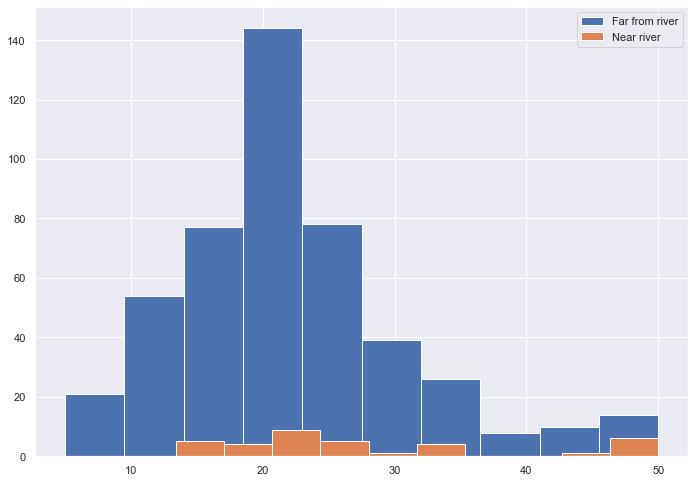

In [607]:
plt.hist(boston_string.MEDV[boston_string['distance'] == 'far'], label='Far from river')
plt.hist(boston_string.MEDV[boston_string.distance == 'near'], label='Near river')
plt.legend()
plt.show()


The Shapiro function tests for normality between the two groups.
TODO interpret 

In [608]:
# test for similar normality
ss.shapiro(results.resid)


(0.9275487661361694, 6.466435443071251e-15)

TODO

In [609]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(CHAS),1312.079271,1.0,15.971512,0.000074
Residual,41404.216144,504.0,NaN,NaN


### ANOVA - Testing for equal variances

The levene function tests to see if the variance of the 2 samples are the same. We can see that they are not similar, where p is equal to 0.032, therefore ANOVA is probably not a relevant analysis of this data.

In [1075]:
ss.levene(boston_string['MEDV'][boston_string['distance'] == 'far'], boston_string['MEDV'][boston_string['distance'] == 'near'])

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

TODO Tukey comparison

In [1085]:
mc = MultiComparison(boston.MEDV[boston['MEDV']==0], boston.MEDV[boston['MEDV']==1])
mc_results = mc.tukeyhsd()
print(mc_results)

ValueError: 2 or more groups required for multiple comparisons

## Keras Neural Network

**Well-trained neural network providing decent predictions of house prices based on the other variables. Good explanations of how to use the neural network and how it works**

### Choose variables to test

In [644]:
# Convert CHAS column to 2 separate integer columns representing housing that is near (1) and far (0) from the river 
# print(boston)
# boston['far'] = (boston['CHAS'] == 'far').astype(np.int)
# boston['near'] = (boston['CHAS'] == 'near').astype(np.int)
# display(boston)

# boston['far'] = (boston['CHAS'] == 0).astype(np.int)
# boston['near'] = (boston['CHAS'] == 1).astype(np.int)
# display(boston)


# Encode the CHAS variable as 0 or 1 to make it easier for the neural network to process.
encoder = pre.LabelBinarizer()
encoder.fit(boston['CHAS'])
boston['coded_chas'] = encoder.transform(boston['CHAS'])
boston['coded_chas']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: coded_chas, Length: 506, dtype: int64

In [711]:
boston['PTRATIO']

0      15.3
1      17.8
2      17.8
3      18.7
4      18.7
       ... 
501    21.0
502    21.0
503    21.0
504    21.0
505    21.0
Name: PTRATIO, Length: 506, dtype: float64

In [645]:
boston['LSTAT']

0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: LSTAT, Length: 506, dtype: float64

## Create dataframes of inputs and outputs
based on the distance from the river and number of rooms.

In [868]:
# create a dataframe of inputs based on the distance from the river and number of rooms, the population status, and pupil teacher ratio.
d = {'room_no': boston['RM'], 'river_proximity': boston['coded_chas'], 'low_status': boston['LSTAT'], 'pupil_teacher':boston['PTRATIO']}
# d = {'rm': boston['RM'], 'encoded_chas': boston['coded_chas']}
inputs_df = pd.DataFrame(data=d)
inputs_df

,room_no,river_proximity,low_status,pupil_teacher
0,6.575,0,4.98,15.3
1,6.421,0,9.14,17.8
2,7.185,0,4.03,17.8
3,6.998,0,2.94,18.7
4,7.147,0,5.33,18.7
...,...,...,...,...
501,6.593,0,9.67,21.0
502,6.120,0,9.08,21.0
503,6.976,0,5.64,21.0
504,6.794,0,6.48,21.0


In [870]:
# Create output dataframe
outputs_df = pd.DataFrame(boston.MEDV)
outputs_df

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [871]:
# # Create neural network
# model = kr.models.Sequential()

# model.add(kr.layers.Dense(10, input_dim=4, activation="linear"))
# model.add(kr.layers.Dense(40, activation="sigmoid"))
# model.add(kr.layers.Dense(10, activation="linear"))
# model.add(kr.layers.Dense(10, activation="linear"))
# model.add(kr.layers.Dense(1,  activation="linear"))

# model.compile(loss="mean_squared_error", optimizer="adam")

# m_1.fit(inputs_df, outputs_df, epochs=15, batch_size=10)



# Add a hidden layer with x neurons and an input layer with 4.
# m_1.add(kr.layers.Dense(units=30, activation='relu', input_dim=4))
# # Add a three neuron output layer.
# m_1.add(kr.layers.Dense(units=3, activation='softmax'))

# # Build the graph.
# m_1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])



## Split the dataset
Split the inputs and outputs into training and test sets.

In [916]:
# Split the inputs and outputs into training and test sets, we are using 80% of the data to train the model.
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs_df, outputs_df, test_size=0.2)

In [873]:
inputs_train

,room_no,river_proximity,low_status,pupil_teacher
105,5.851,0,16.47,20.9
266,7.014,0,14.79,13.0
163,8.375,1,3.32,14.7
12,5.889,0,15.71,15.2
346,5.898,0,12.67,18.8
...,...,...,...,...
212,5.807,1,16.03,18.6
380,6.968,0,17.21,20.2
204,8.034,0,2.88,14.7
167,5.877,0,12.14,14.7


In [874]:
inputs_test.iloc[0]

room_no             6.02
river_proximity     0.00
low_status         10.11
pupil_teacher      16.60
Name: 176, dtype: float64

In [875]:
# model.predict(inputs_test.as_matrix()[0:1])
# model.predict(inputs_test.to_numpy())

## Build the neural network

In [876]:
# Create neural network
model = kr.models.Sequential()

# linear activation because the median house value is an integer, not a value between 0 and 1
model.add(kr.layers.Dense(100, input_dim=4, activation="tanh")) # relu/sigmoid/linear/tanh
model.add(kr.layers.Dense(40, activation="linear"))
model.add(kr.layers.Dense(40, activation="linear"))
model.add(kr.layers.Dense(10, activation="linear"))
model.add(kr.layers.Dense(10, activation="linear"))
model.add(kr.layers.Dense(1,  activation="linear"))

# mean_squared_error loss function is appropriate for integers | adam optimiser changes the learning rate at different points
model.compile(loss="mean_squared_error", optimizer="adam")

## Train
Fit the NN to the training set>
Loss reduces from .. to .. 

In [877]:
# Train the neural network on the training data.
# epochs batch size
model.fit(inputs_train, outputs_train, epochs=100, batch_size=10)

Epoch 1/100
404/404 [==============================] - 1s 3ms/step - loss: 200.6180
Epoch 2/100
404/404 [==============================] - 0s 285us/step - loss: 49.8364
Epoch 3/100
404/404 [==============================] - 0s 300us/step - loss: 34.0202
Epoch 4/100
404/404 [==============================] - 0s 296us/step - loss: 28.9563
Epoch 5/100
404/404 [==============================] - 0s 296us/step - loss: 24.0847
Epoch 6/100
404/404 [==============================] - 0s 294us/step - loss: 22.8235
Epoch 7/100
404/404 [==============================] - 0s 309us/step - loss: 21.3373
Epoch 8/100
404/404 [==============================] - 0s 295us/step - loss: 20.5958
Epoch 9/100
404/404 [==============================] - 0s 296us/step - loss: 21.1504
Epoch 10/100
404/404 [==============================] - 0s 293us/step - loss: 22.2643
Epoch 11/100
404/404 [==============================] - 0s 300us/step - loss: 20.5235
Epoch 12/100
404/404 [==============================] - 0s 287us

404/404 [==============================] - 0s 284us/step - loss: 16.9788
Epoch 97/100
404/404 [==============================] - 0s 284us/step - loss: 16.6542
Epoch 98/100
404/404 [==============================] - 0s 293us/step - loss: 18.6288
Epoch 99/100
404/404 [==============================] - 0s 285us/step - loss: 17.9161
Epoch 100/100
404/404 [==============================] - 0s 302us/step - loss: 18.6934


## Predict
Run a prediction on the test input dataset.

In [878]:
model.predict(inputs_test.as_matrix()).round(1).T

/Users/joanhealy1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[20.6, 11.3, 13.2, 11.2, 10.2, 32.7, 35. , 39.1, 17.3, 18.3, 18.1,
        15.5, 34.4,  8.8,  8.8, 17.6, 24.6, 24. , 14.6, 20.1, 10.7, 24.7,
        26.3, 20.1, 24.2, 21.4, 33.8, 21.8, 14.5, 20.3, 24.8, 22.1, 16.9,
        17.8, 16.1, 12.6,  9.6,  9.2, 18.3, 17.7, 18.4, 14.2, 19.9, 17.8,
        16.8, 20.1, 13.4, 25.9, 15.2, 15.5, 20.2, 15. , 10.3, 15. , 15. ,
        14. , 29.7, 17.3, 33.7, 33.3, 23.3, 25.6, 19.6, 17.1, 12.2, 23.9,
        44.5, 14.4, 20.3, 12.7, 10.1, 19.1, 21.4, 19. , 14.5, 40.1, 23.7,
        35.9, 22.1, 48.5, 12.9, 15.2, 20.6, 14.1, 18.2, 15.1, 17.8, 18.9,
        17. , 44.1, 16.6, 45.9, 25.5, 30.3, 21.3, 22.9, 15. , 17.1, 12.1,
        22.6, 19.7, 23.5]], dtype=float32)

In [879]:
outputs_test.as_matrix().T

/Users/joanhealy1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[23.2, 13.4, 13.5,  7.5, 12.3, 34.9, 50. , 44.8, 17.8, 21.4, 22.5,
        12.7, 28.5, 10.5, 14.4, 19.9, 22.9, 21.9, 11.7, 24.4, 14.4, 22.8,
        24.5, 23. , 25. , 11.9, 29.6, 22.8, 15.4, 18.9, 24.1, 28.4, 16.1,
        19.6, 14.2,  8.4, 11.9,  7.2, 24.4, 18.7, 21. , 13.1, 24. , 21.1,
        13.8, 19.4,  7.2, 26.6, 18.7, 15.2, 18.2, 13.1,  8.7, 14.9,  9.6,
        22.5, 33.2, 10.9, 36. , 34.7, 25.2, 24.3, 21.4, 16.7, 13.6, 25. ,
        43.5, 13.6, 18.6,  8.8,  8.4, 24.3, 27.5, 20.1, 18.8, 36.4, 29.1,
        34.6, 50. , 50. ,  8.5, 14.5, 22.2, 13.4, 29.6, 21.7, 19.5, 21.5,
        18. , 46. , 26.4, 50. , 23.7, 30.1, 28.1, 28.7, 15.6, 19.9, 13.9,
        23.1, 18.5, 22.3]])

In [880]:
# Round predicted values down to nearest integer and then transpose (swap columns with rows) the dataset
# np.around(model.predict(inputs_test).T)

## Evaluate 
How different are our predictions from our inputs?

Calculate the loss function using evaluate (mean squared error in our case).
The higher the value the worse the NN is a predictions.

In [881]:
model.evaluate(inputs_test, outputs_test)

102/102 [==============================] - 0s 1ms/step


22.812969693950578

In [882]:
# mean squared error is 210 -> common way to measure the difference between 2 arrays, find out how effective the NN is at predictions.
np.sqrt(np.sum((model.predict(inputs_test).T - outputs_test.as_matrix())**2))

/Users/joanhealy1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


1331.9836662503678

## Scale
StandardScaler makes the mean of the distribution 0.

In [893]:
scaler = pre.StandardScaler()
scaler.fit(inputs_train)
inputs_train_scaled = scaler.transform(inputs_train)

In [895]:
# Create neural network
model = kr.models.Sequential()

# linear activation because the median house value is an integer, not a value between 0 and 1
model.add(kr.layers.Dense(100, input_dim=4, activation="tanh")) 
model.add(kr.layers.Dense(40, activation="linear"))
model.add(kr.layers.Dense(40, activation="linear"))
model.add(kr.layers.Dense(10, activation="linear"))
model.add(kr.layers.Dense(10, activation="linear"))
model.add(kr.layers.Dense(1,  activation="linear"))

# mean_squared_error loss function is appropriate for integers | adam optimiser changes the learning rate at different points
model.compile(loss="mean_squared_error", optimizer="adam")

In [896]:
model.fit(inputs_train, outputs_train, epochs=100, batch_size=10)

Epoch 1/100
404/404 [==============================] - 1s 3ms/step - loss: 202.1693
Epoch 2/100
404/404 [==============================] - 0s 320us/step - loss: 43.9050
Epoch 3/100
404/404 [==============================] - 0s 301us/step - loss: 34.2569
Epoch 4/100
404/404 [==============================] - 0s 287us/step - loss: 28.2822
Epoch 5/100
404/404 [==============================] - 0s 300us/step - loss: 26.4159
Epoch 6/100
404/404 [==============================] - 0s 295us/step - loss: 22.4772
Epoch 7/100
404/404 [==============================] - 0s 315us/step - loss: 23.4196
Epoch 8/100
404/404 [==============================] - 0s 295us/step - loss: 22.4223
Epoch 9/100
404/404 [==============================] - 0s 312us/step - loss: 20.8585
Epoch 10/100
404/404 [==============================] - 0s 304us/step - loss: 20.0809
Epoch 11/100
404/404 [==============================] - 0s 316us/step - loss: 20.1207
Epoch 12/100
404/404 [==============================] - 0s 301us

404/404 [==============================] - 0s 311us/step - loss: 17.8666
Epoch 97/100
404/404 [==============================] - 0s 307us/step - loss: 18.4813
Epoch 98/100
404/404 [==============================] - 0s 288us/step - loss: 17.8600
Epoch 99/100
404/404 [==============================] - 0s 287us/step - loss: 17.4511
Epoch 100/100
404/404 [==============================] - 0s 286us/step - loss: 17.8584


In [897]:
model.predict(inputs_test.as_matrix()).round(1).T

/Users/joanhealy1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[22.1, 13.8, 15.5, 13.8, 12.3, 32.8, 35.1, 39.1, 19. , 19.8, 19.7,
        17.3, 34.4, 10.6, 11. , 19.1, 24.7, 24.7, 16.5, 21.5, 13.1, 24.6,
        26.7, 21.3, 24.3, 21.7, 33.9, 23.2, 16.7, 21.5, 26. , 23.4, 18.4,
        19.3, 17.8, 15.4, 11.4, 11.3, 19.6, 19.2, 19.9, 16.1, 21.4, 19.3,
        18.3, 21.6, 15.8, 26. , 17.4, 17.4, 21.2, 17.4, 12.5, 17.1, 17. ,
        16.2, 30. , 18.8, 34.6, 33.4, 23.7, 26.4, 21.1, 18.7, 14.5, 24.2,
        45. , 16.4, 21.5, 15.1, 12.6, 20.6, 22.3, 20.5, 16.6, 40.2, 24.5,
        36.5, 22.8, 48. , 15.2, 17.1, 22.1, 16.2, 19.7, 18.1, 19.3, 21.1,
        18.6, 44.2, 18.3, 45.6, 26.1, 30.4, 22.5, 24.3, 16.8, 18.6, 14.8,
        22.5, 21. , 24.5]], dtype=float32)

In [898]:
outputs_test.as_matrix().T

/Users/joanhealy1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[23.2, 13.4, 13.5,  7.5, 12.3, 34.9, 50. , 44.8, 17.8, 21.4, 22.5,
        12.7, 28.5, 10.5, 14.4, 19.9, 22.9, 21.9, 11.7, 24.4, 14.4, 22.8,
        24.5, 23. , 25. , 11.9, 29.6, 22.8, 15.4, 18.9, 24.1, 28.4, 16.1,
        19.6, 14.2,  8.4, 11.9,  7.2, 24.4, 18.7, 21. , 13.1, 24. , 21.1,
        13.8, 19.4,  7.2, 26.6, 18.7, 15.2, 18.2, 13.1,  8.7, 14.9,  9.6,
        22.5, 33.2, 10.9, 36. , 34.7, 25.2, 24.3, 21.4, 16.7, 13.6, 25. ,
        43.5, 13.6, 18.6,  8.8,  8.4, 24.3, 27.5, 20.1, 18.8, 36.4, 29.1,
        34.6, 50. , 50. ,  8.5, 14.5, 22.2, 13.4, 29.6, 21.7, 19.5, 21.5,
        18. , 46. , 26.4, 50. , 23.7, 30.1, 28.1, 28.7, 15.6, 19.9, 13.9,
        23.1, 18.5, 22.3]])

In [899]:
model.evaluate(inputs_test, outputs_test)

102/102 [==============================] - 0s 1ms/step


22.44160860192542

## Whitening
Remove the correlation between the different variables to attempt to get a more accurate prediction.

In [900]:
import sklearn.decomposition as dec

pca = dec.PCA(n_components=4, whiten=True)
pca.fit(inputs_train)
inputs_train_white = pd.DataFrame(pca.transform(inputs_train), columns=inputs_train.columns)
inputs_train_white

,room_no,river_proximity,low_status,pupil_teacher
0,0.600736,-0.994728,0.137437,-0.149866
1,0.228720,2.798056,-1.021924,-0.552886
2,-1.350698,1.331241,-2.518796,3.352222
3,0.402240,1.749870,0.707384,-0.356224
4,0.037910,-0.188931,0.651943,-0.218921
...,...,...,...,...
399,0.502345,0.108673,0.440561,3.729209
400,0.682427,-0.583261,-1.896624,-0.296794
401,-1.408590,1.292518,-1.806381,-0.565545
402,-0.102126,1.785117,1.147857,-0.362228


In [911]:
model = kr.models.Sequential()

model.add(kr.layers.Dense(100, input_dim=4, activation="tanh")) 
model.add(kr.layers.Dense(40, activation="linear"))
model.add(kr.layers.Dense(40, activation="linear"))
model.add(kr.layers.Dense(10, activation="linear"))
model.add(kr.layers.Dense(10, activation="linear"))
model.add(kr.layers.Dense(1,  activation="linear"))

model.compile(loss="mean_squared_error", optimizer="adam")

In [912]:
# Train the neural network.
model.fit(inputs_train_white, outputs_train, epochs=100, batch_size=10)

Epoch 1/100
404/404 [==============================] - 1s 3ms/step - loss: 511.8179
Epoch 2/100
404/404 [==============================] - 0s 290us/step - loss: 131.3106
Epoch 3/100
404/404 [==============================] - 0s 292us/step - loss: 32.7994
Epoch 4/100
404/404 [==============================] - 0s 288us/step - loss: 28.8149
Epoch 5/100
404/404 [==============================] - 0s 302us/step - loss: 29.0098
Epoch 6/100
404/404 [==============================] - 0s 292us/step - loss: 28.2385
Epoch 7/100
404/404 [==============================] - 0s 307us/step - loss: 28.0321
Epoch 8/100
404/404 [==============================] - 0s 306us/step - loss: 29.8003
Epoch 9/100
404/404 [==============================] - 0s 324us/step - loss: 28.9557
Epoch 10/100
404/404 [==============================] - 0s 308us/step - loss: 27.9358
Epoch 11/100
404/404 [==============================] - 0s 373us/step - loss: 27.0685
Epoch 12/100
404/404 [==============================] - 0s 372u

404/404 [==============================] - 0s 302us/step - loss: 15.6101
Epoch 97/100
404/404 [==============================] - 0s 304us/step - loss: 16.4016
Epoch 98/100
404/404 [==============================] - 0s 288us/step - loss: 14.9467
Epoch 99/100
404/404 [==============================] - 0s 296us/step - loss: 14.3004
Epoch 100/100
404/404 [==============================] - 0s 301us/step - loss: 14.4722


In [913]:
model.predict(inputs_test.as_matrix()).round(1).T

/Users/joanhealy1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[-24.2, -31.1, -30.2, -32.4, -29.9,  -3.4,   2.9,   1.5, -30.7,
        -25.4, -26.5, -28.3,   7.3, -27. , -26.7, -26.8,   4.5,  -7.4,
        -28.3, -23.6, -28.8,   5.5,  -1.7, -20.6,   3.6,  -5. ,   7. ,
        -23.1, -30.6, -18.7, -17.9, -17.3, -24.6, -25.1, -28. , -32.1,
        -26.2, -28.4, -28.9, -25.2, -26.6, -28.7, -24.8, -26.4, -27.8,
        -24.9, -30.9,   4.6, -30.5, -30.3, -17.8, -29.8, -31.2, -30.9,
        -30.2, -29.9,  -1.9, -27.1, -24.5,   4.6,  -1.6, -11.3, -25. ,
        -27.9, -29.5,  -0.1,  -3.2, -29.5, -19.3, -30.3, -29.8, -26. ,
        -14.5, -23.1, -29.7,   1.2,  -8.3, -18.5, -15.4,   0.4, -29.8,
        -29.8, -26.9, -28.8, -27.9, -31.4, -26.6, -31. , -27.4,   0.4,
        -27.8,  -0.2,  -5.2,   3.7, -18.8, -24.1, -28.1, -26. , -31.9,
          4. , -19.8, -14. ]], dtype=float32)

In [914]:
outputs_test.as_matrix().T

/Users/joanhealy1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[23.2, 13.4, 13.5,  7.5, 12.3, 34.9, 50. , 44.8, 17.8, 21.4, 22.5,
        12.7, 28.5, 10.5, 14.4, 19.9, 22.9, 21.9, 11.7, 24.4, 14.4, 22.8,
        24.5, 23. , 25. , 11.9, 29.6, 22.8, 15.4, 18.9, 24.1, 28.4, 16.1,
        19.6, 14.2,  8.4, 11.9,  7.2, 24.4, 18.7, 21. , 13.1, 24. , 21.1,
        13.8, 19.4,  7.2, 26.6, 18.7, 15.2, 18.2, 13.1,  8.7, 14.9,  9.6,
        22.5, 33.2, 10.9, 36. , 34.7, 25.2, 24.3, 21.4, 16.7, 13.6, 25. ,
        43.5, 13.6, 18.6,  8.8,  8.4, 24.3, 27.5, 20.1, 18.8, 36.4, 29.1,
        34.6, 50. , 50. ,  8.5, 14.5, 22.2, 13.4, 29.6, 21.7, 19.5, 21.5,
        18. , 46. , 26.4, 50. , 23.7, 30.1, 28.1, 28.7, 15.6, 19.9, 13.9,
        23.1, 18.5, 22.3]])

In [915]:
model.evaluate(inputs_test, outputs_test)

102/102 [==============================] - 0s 1ms/step


1799.5118815104167

In [910]:
# How different are our predictions from our inputs?
# mean squared error is 210 -> common way to measure the difference between 2 arrays, find out how effective the NN is at predictions.
np.sqrt(np.sum((model.predict(inputs_test).T - outputs_test.as_matrix())**2))

/Users/joanhealy1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


4287.858357583345

### TTest ?

## Keras #2

In [ ]:
# Start a neural network, building it by layers.
model = kr.models.Sequential()

# Add a hidden layer with 64 neurons and an input layer with 4.
model.add(kr.layers.Dense(units=64, activation='relu', input_dim=1))
# Add a three neuron output layer.
model.add(kr.layers.Dense(units=1, activation='softmax'))

# Build the graph.
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#mean_squared_error

In [ ]:
# Compare the predictions to the actual classes.
predictions_labels == encoder.inverse_transform(outputs_test)

In [ ]:
(predictions_labels == encoder.inverse_transform(outputs_test)).sum()

References:  
1. https://kite.com/python/docs/sklearn.utils.Bunch  
1. https://stackoverflow.com/questions/48769682/how-do-i-convert-data-from-a-scikit-learn-bunch-object-to-a-pandas-dataframe/48769980  
1. https://www.kaggle.com/c/boston-housing/data  
1. https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
1. https://nbviewer.jupyter.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb
1. https://nbviewer.jupyter.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/master/regression.ipynb
1. https://nbviewer.jupyter.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/master/anova.ipynb  
1. https://pythonfordatascience.org/anova-python/

